In [158]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
import scipy.signal
from scipy.fft import fft

from mpl_toolkits import mplot3d
from functions import *
data = np.loadtxt("lff.dat")

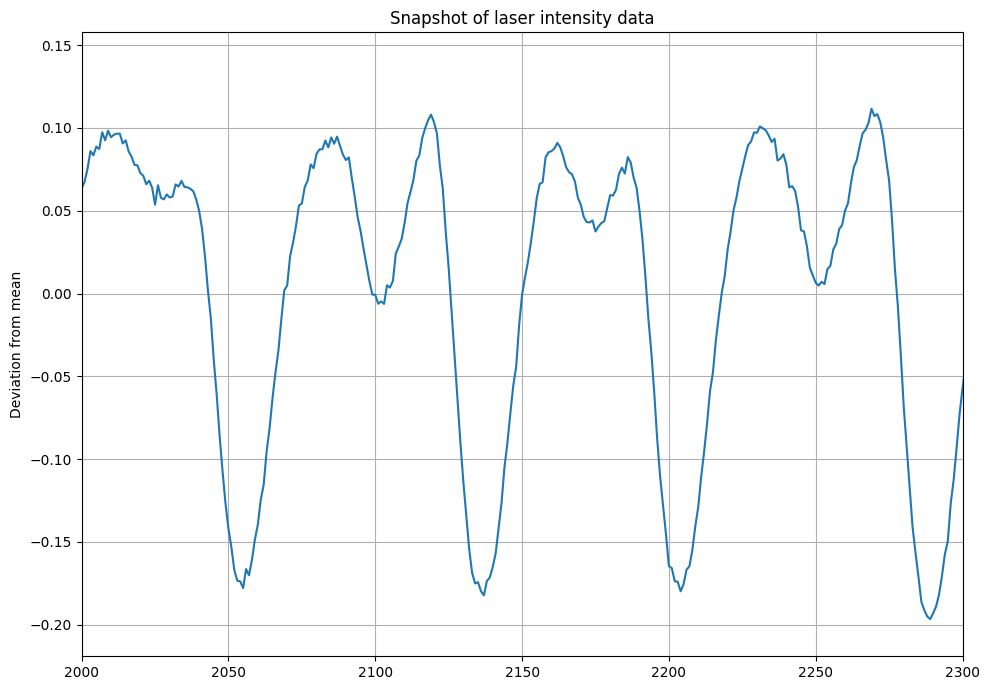

In [151]:

plt.plot(data)
plt.title("Snapshot of laser intensity data")
plt.grid()
plt.ylabel("Deviation from mean")
plt.xlim((2000,2300))

plt.show()


In [111]:
# count the number of spikes 
thresh = -0.03
intervals = np.diff([x for x in range(len(data)-1) if data[x] < thresh and data[x+1] > thresh])
print(n:=len(intervals))

710


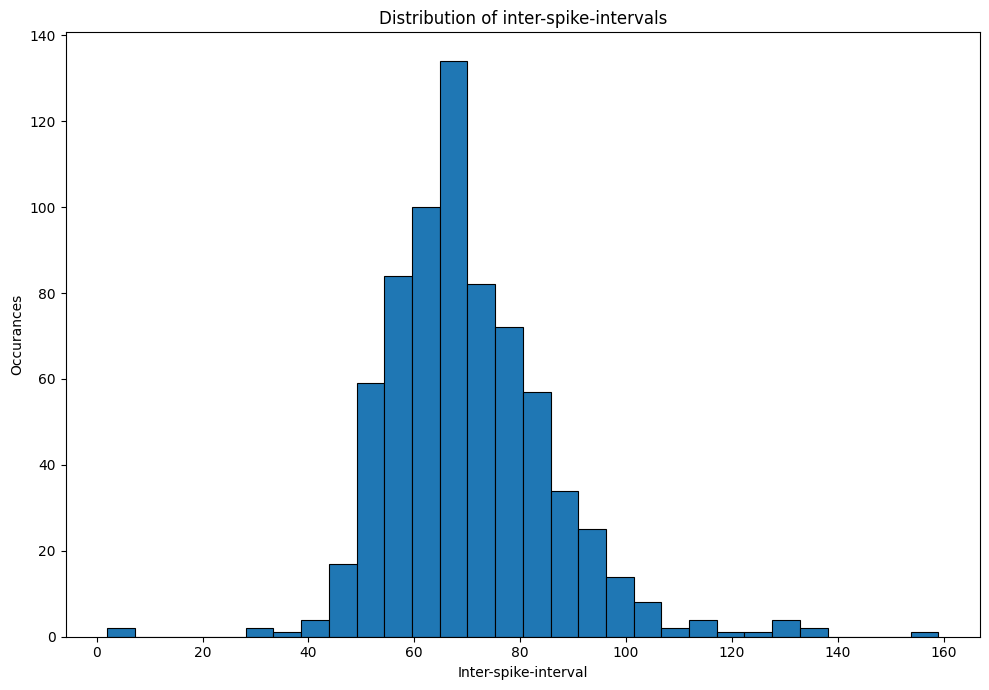

70.33380281690141
243.32660384844277
0.9201086810263118
3.6182666408308775
0.22178424810059885


In [154]:
#Plot the histogram of data values and calculate the moments of the distribution.
plt.hist(intervals, 30, edgecolor='black', linewidth=0.8)
plt.xlabel('Inter-spike-interval')
plt.ylabel('Occurances')
plt.title('Distribution of inter-spike-intervals')
plt.show()

S = np.std(intervals)
median = np.median(intervals)
mean = np.mean(intervals)
variance = np.var(intervals)
skewness = scipy.stats.skew(intervals)
kurtosis = scipy.stats.kurtosis(intervals)
CoV = S/abs(mean)
print(mean)
print(variance)
print(skewness)
print(kurtosis)
print(CoV)


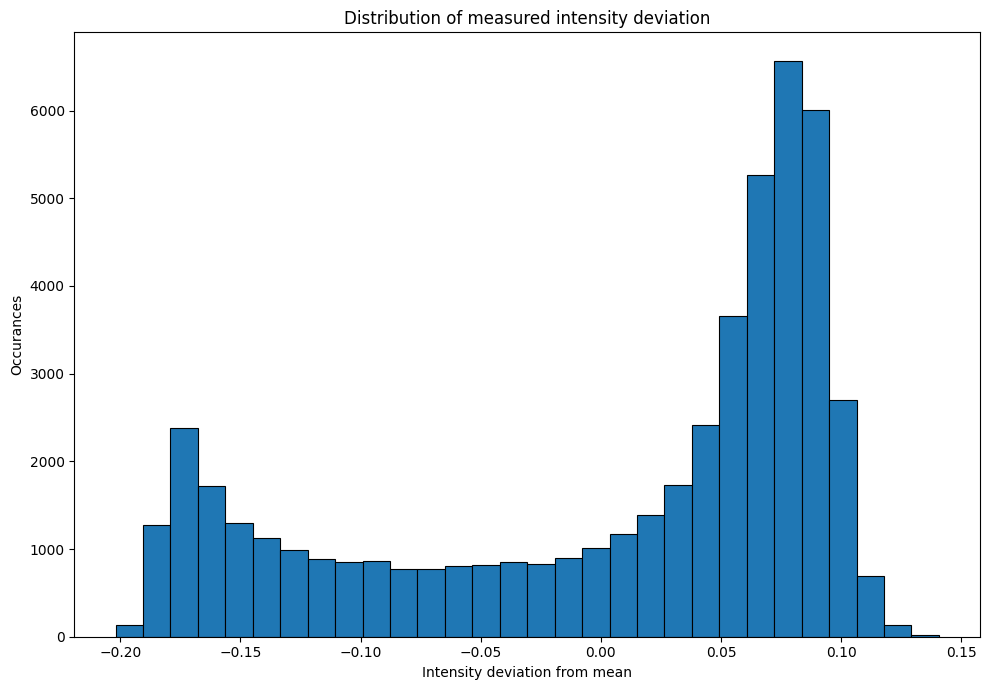

0.0038298187607402707
0.008849552152319803
-0.8085446658920803
-0.8552925577372221
24.563057464179284


In [155]:
#Plot the histogram of data values and calculate the moments of the distribution.
plt.hist(data, 30, edgecolor='black', linewidth=0.8)
plt.xlabel('Intensity deviation from mean')
plt.ylabel('Occurances')
plt.title('Distribution of measured intensity deviation')
plt.show()

S = np.std(data)
median = np.median(data)
mean = np.mean(data)
variance = np.var(data)
skewness = scipy.stats.skew(data)
kurtosis = scipy.stats.kurtosis(data)
CoV = S/abs(mean)
print(mean)
print(variance)
print(skewness)
print(kurtosis)
print(CoV)

In [114]:
#The four moments of distribution are: Mean, Variance, Skewness, Kurtosis, Coefficient of Variation

S = np.std(intervals)
median = np.median(intervals)
mean = np.mean(intervals)
variance = np.var(intervals)
skewness = scipy.stats.skew(intervals)
kurtosis = scipy.stats.kurtosis(intervals)
CoV = S/abs(mean)
print(median)
print(mean)
print(skewness)
print(kurtosis)
print(CoV)

68.0
70.33380281690141
0.9201086810263118
3.6182666408308775
0.22178424810059885


In [115]:
#The four moments of distribution are: Mean, Variance, Skewness, Kurtosis, Coefficient of Variation

S = np.std(data)
median = np.median(data)
mean = np.mean(data)
variance = np.var(data)
skewness = scipy.stats.skew(data)
kurtosis = scipy.stats.kurtosis(data)
CoV = S/abs(mean)
print(median)
print(mean)
print(variance)
print(skewness)
print(kurtosis)
print(CoV)

0.0494100004
0.0038298187607402707
0.008849552152319803
-0.8085446658920803
-0.8552925577372221
24.563057464179284


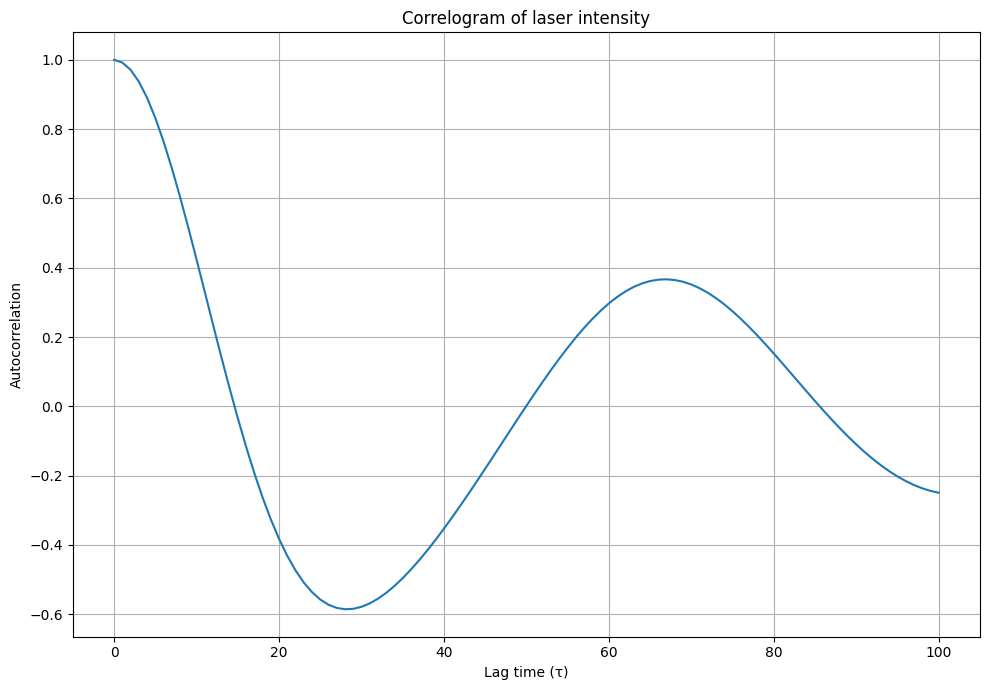

In [168]:
# Calculate and plot the autocorrelation function.

def ACF(data, tau):

    N = len(data)
    mean = np.mean(data)
    std = np.std(data)
    acf = 1 / ((std**2) *(N-tau)) * sum([(data[t] - mean) * (data[t+tau] - mean) for t in range(1, N-tau)])
    return acf

max_lag = 100
lags = np.arange(max_lag+1)
acf = np.zeros_like(lags, dtype=float)
for tau in lags:
    acf[tau] = np.mean(ACF(data, tau))

# Plot autocorrelation vs. lag time
plt.plot(lags, acf)
plt.grid()
plt.xlabel('Lag time (τ)')
plt.ylabel('Autocorrelation')
plt.title('Correlogram of laser intensity')
plt.show()

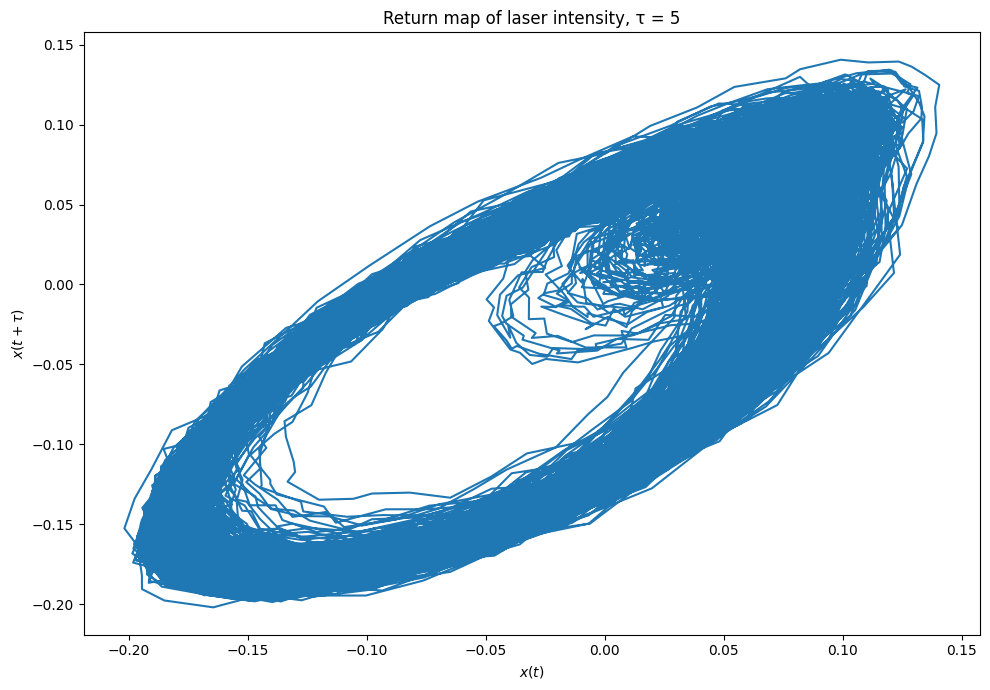

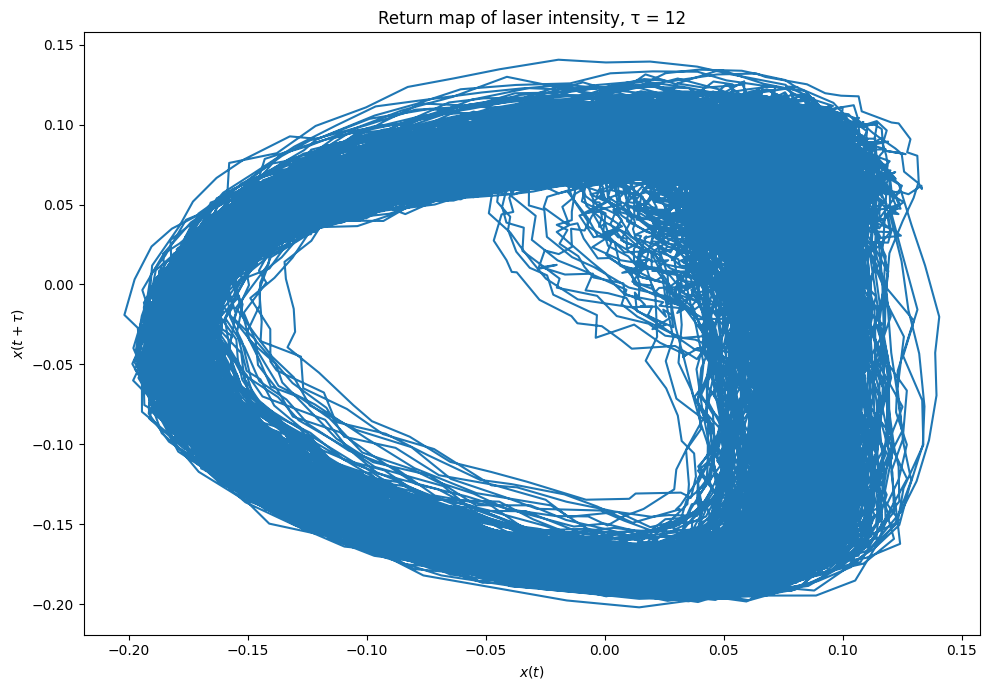

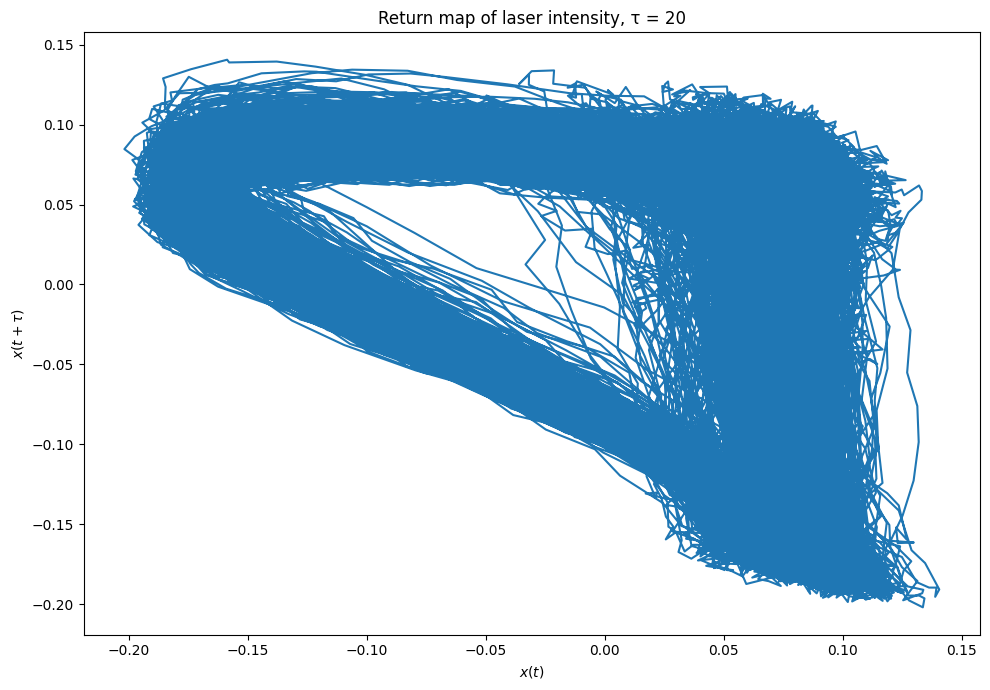

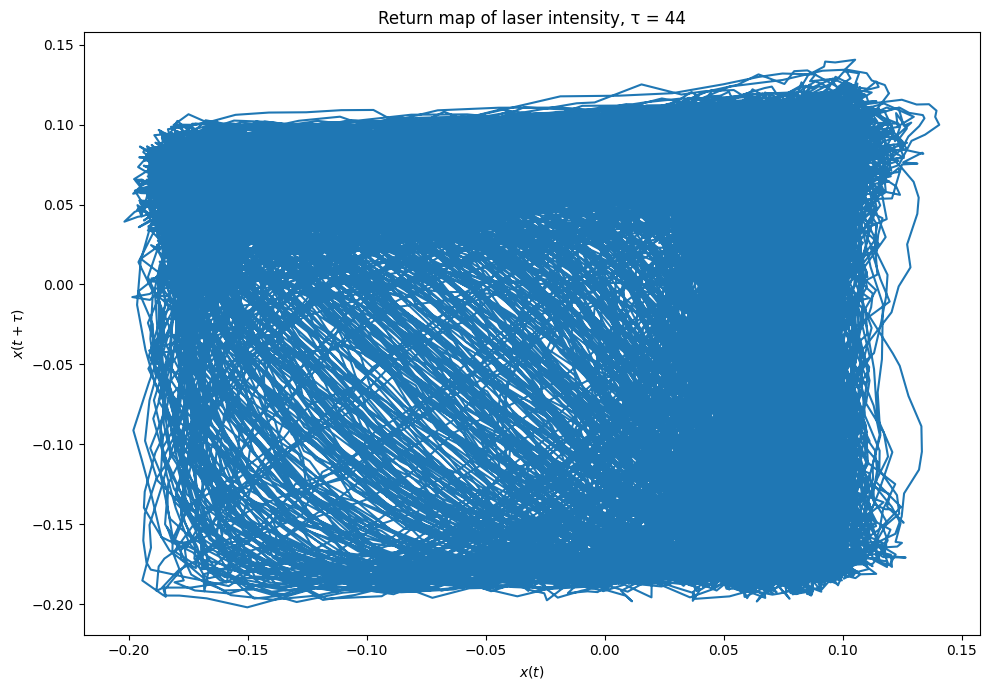

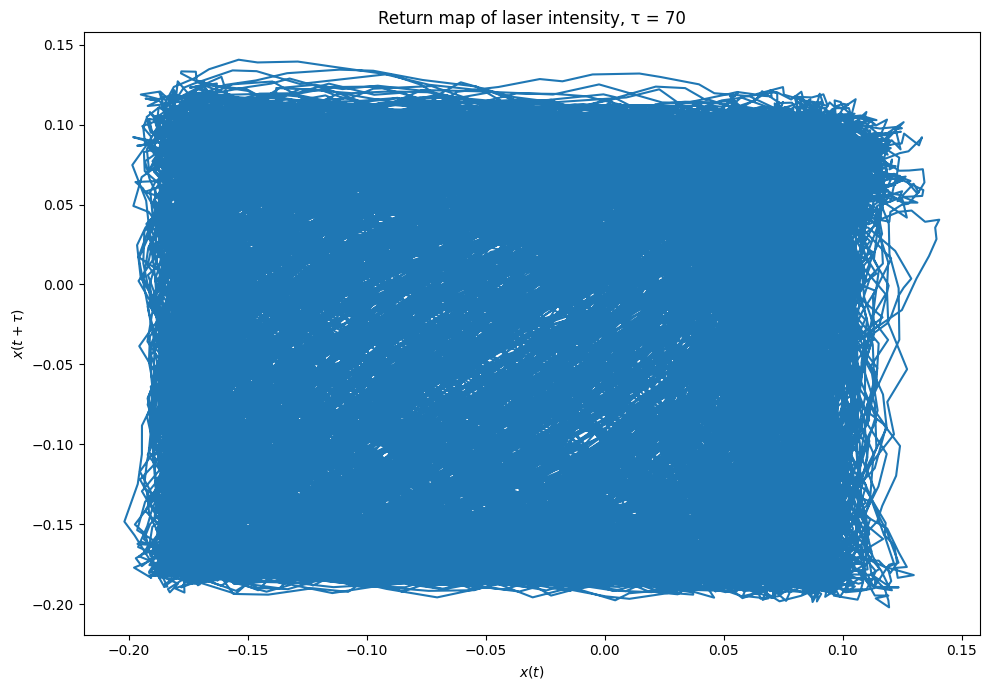

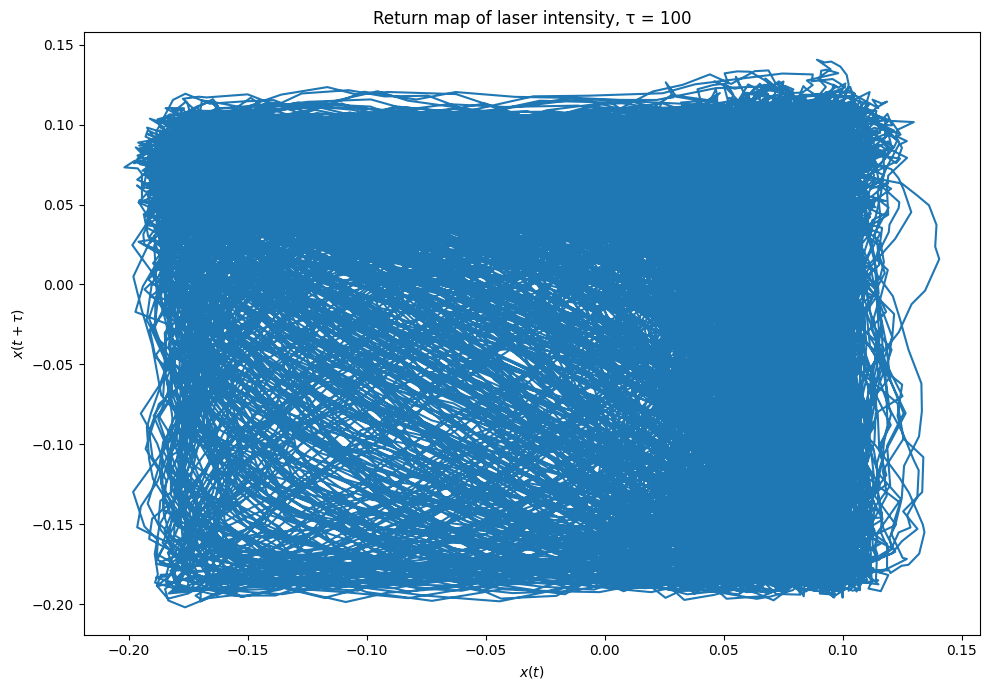

[None, None, None, None, None, None]

In [153]:
def return_map(data, tau):
    plt.rcParams["figure.figsize"] = [10.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(data[:-(tau)], data[tau:])
    plt.xlabel("$x(t)$")
    plt.ylabel("$x(t+τ)$")
    plt.title(f"Return map of laser intensity, τ = {tau}")
    plt.show()
[return_map(data, tau) for tau in [5, 12,20,44,70,100]]


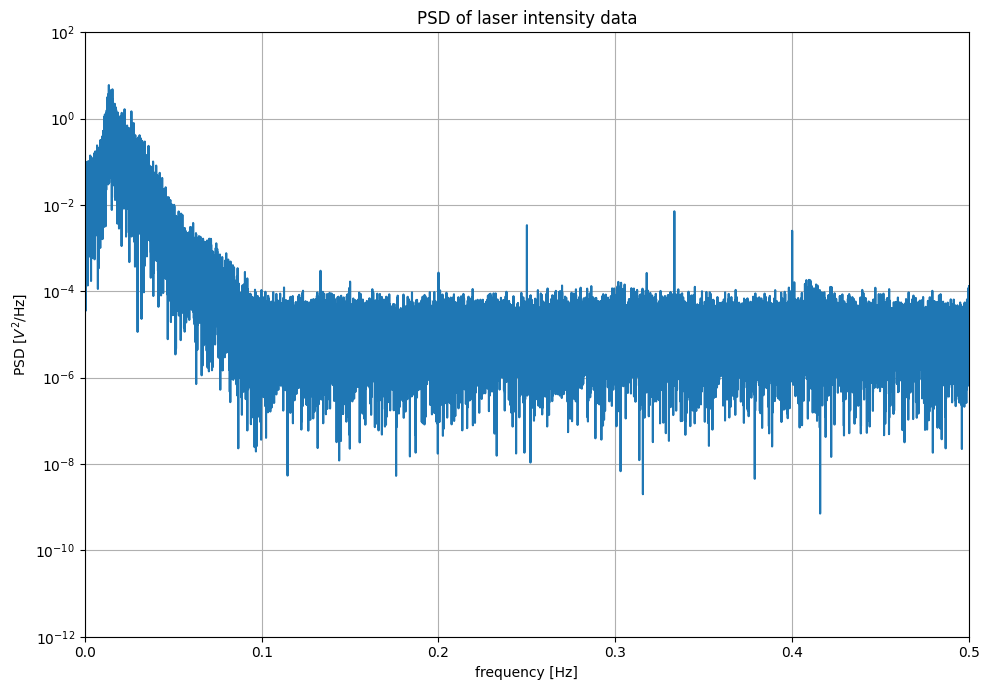

In [167]:
(f, S) = scipy.signal.periodogram(data, 1, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-12, 1e2])
plt.xlim([0,0.5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')
plt.grid()
plt.title("PSD of laser intensity data")
plt.show()

low_f_mask = f <= 0.2
high_f_mask = f > 0.2
low_f_S = S[low_f_mask]
high_f_S = S[high_f_mask]

low_f = f[low_f_mask]
high_f = f[high_f_mask]

# Find the indices of the two highest peaks in each region
low_f_indices = np.argsort(low_f_S)[::-1][:2]
high_f_indices = np.argsort(high_f_S)[::-1][:2]

# Get the peak frequencies in each region
low_f_peaks = low_f[low_f_indices]
high_f_peaks = high_f[high_f_indices]


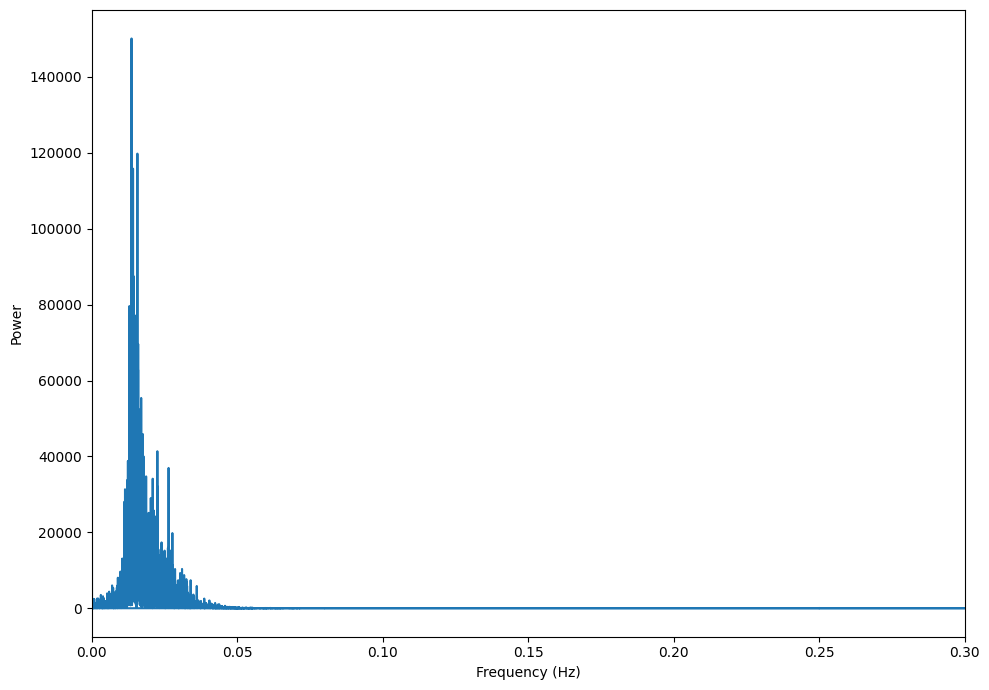

In [166]:
fft_data = fft(data)
t = np.arange(len(data))

# Compute the power spectrum
power_spectrum = np.abs(fft_data)**2

# Create the frequency axis
freq_axis = np.fft.fftfreq(len(data), t[1] - t[0])

peak_freq = freq_axis[np.argmax(power_spectrum)]

# Plot the power spectrum
plt.plot(freq_axis, power_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0,0.3)
plt.show()

In [147]:
print(low_f_peaks)

[0.01362 0.01564]


As we can see, the peak of the lower range of the PSD seems to coincide with 1/ISI, which is 0.014

Reconstruct the attractor from peaks of the PSD:

63


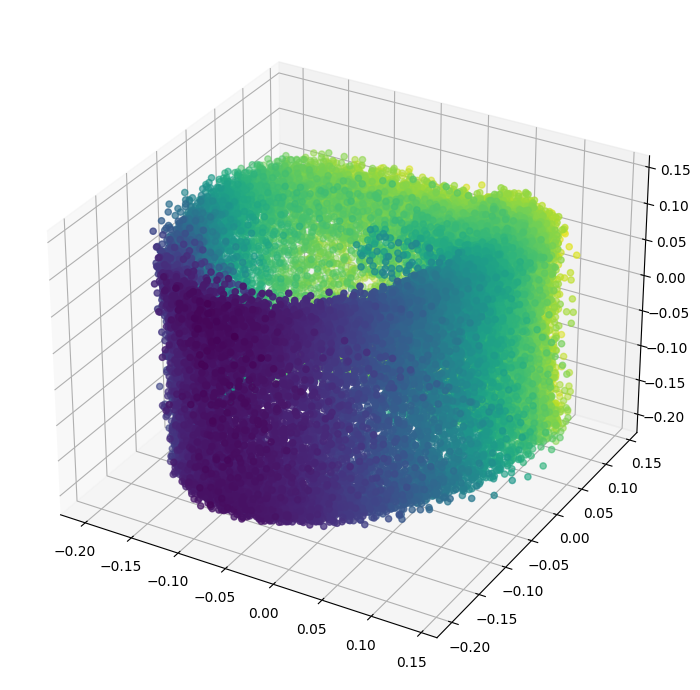

4


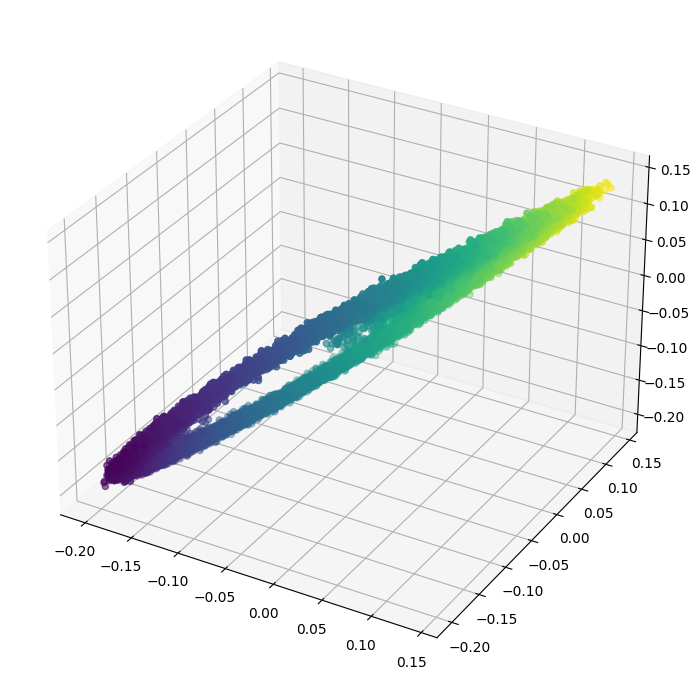

In [150]:
def attractor(ts, tau_1, tau_2):

    tau_1, tau_2 = [int(tau_1), int(tau_2)]
    print(tau_2)
    ax = plt.axes(projection='3d')

    zline = ts[:-(tau_1 + tau_2)]
    xline = ts[tau_1:-(tau_2)]
    yline = ts[tau_2:-(tau_1)]
    ax.scatter3D(xline, yline, zline, c=yline, cmap='viridis')
    plt.show()
attractor(data, 1/low_f_peaks[0], 1/low_f_peaks[1])
attractor(data, 1/high_f_peaks[0], 1/high_f_peaks[1])


Blubb

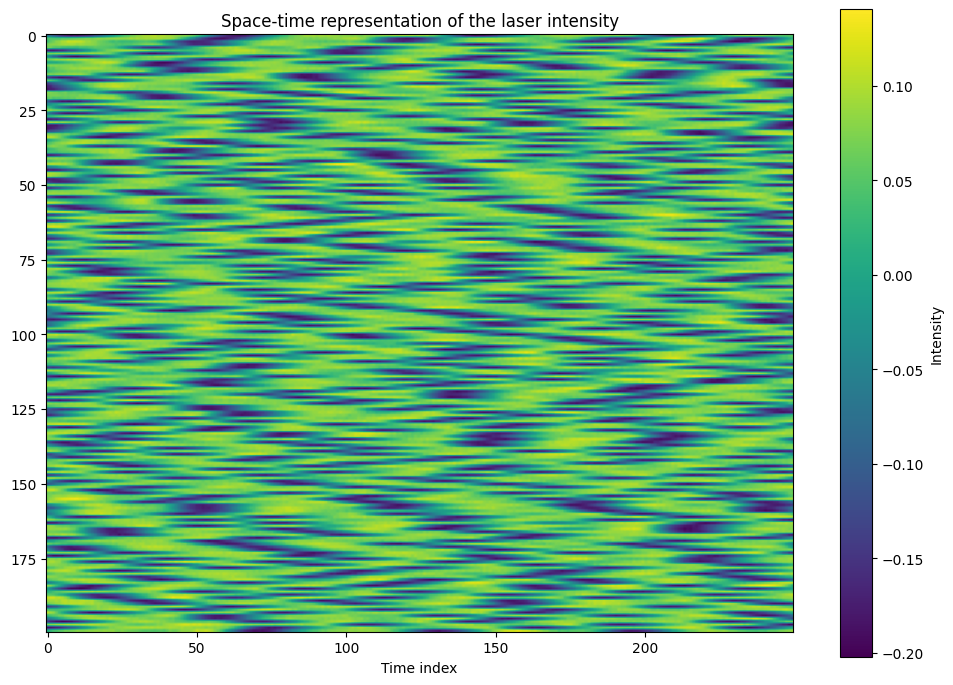

In [120]:
A = np.reshape(data, (200, 250))

plt.imshow(A, cmap='viridis')
colorbar = plt.colorbar()
colorbar.set_label('Intensity')
plt.xlabel("Time index")
plt.title("Space-time representation of the laser intensity")
plt.show()